In [87]:
import pycaret
pycaret.__version__

'3.2.0'

In [88]:
import pandas as pd
import numpy as np

In [89]:
#ùmlflow ui

In [90]:
import pandas as pd 
data=pd.read_csv('insurance_claims.csv')

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [92]:
data.shape

(1000, 40)

In [93]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

netoyage des donnees

In [94]:
data.authorities_contacted.unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

In [95]:
data.authorities_contacted.replace(to_replace='None',value=np.NaN, inplace=True)

In [96]:
data.authorities_contacted.fillna('Other',inplace=True)

In [97]:
data.authorities_contacted.unique()

array(['Police', 'Other', 'Fire', 'Ambulance'], dtype=object)

In [98]:
data.drop(labels='_c39',inplace=True,axis=1)

In [99]:
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

division des donnees

In [101]:
data_train=data.sample(frac=0.9,random_state=101)
data_train.reset_index(drop=True, inplace=True)

In [102]:
data_train.shape

(900, 39)

In [103]:
data_test=data.drop(data_train.index)
data_test.reset_index(drop=True, inplace=True)

In [104]:
data_test.shape

(100, 39)

In [105]:
data_train.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,131,29,811042,2013-07-04,IN,250/500,1000,978.27,0,479821,...,3,NO,76400,15280,7640,53480,Suburu,Forrestor,2003,N
1,194,35,275092,2012-03-14,IL,500/1000,500,1416.24,0,441659,...,0,?,5940,1080,540,4320,Nissan,Pathfinder,2003,N
2,87,31,853360,2009-06-26,IN,500/1000,1000,1074.07,0,451312,...,3,YES,60940,5540,11080,44320,Nissan,Ultima,2006,Y
3,9,24,326180,2002-05-25,IL,100/300,2000,1304.46,0,473349,...,3,YES,5940,540,1080,4320,Audi,A5,2001,Y
4,73,26,918777,2003-04-04,IL,250/500,2000,1191.19,4000000,468813,...,1,YES,40160,5020,0,35140,Chevrolet,Tahoe,2003,N


In [106]:
data_test.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,1,33,388616,1995-12-06,OH,250/500,2000,1391.63,0,466390,...,3,NO,69400,6940,6940,55520,Mercedes,C300,2000,N
1,5,21,577992,2002-11-13,IN,250/500,500,915.41,5000000,612316,...,0,NO,40500,4050,4050,32400,Nissan,Pathfinder,1998,N
2,64,28,342830,1991-11-09,IL,500/1000,1000,1468.82,0,474731,...,1,NO,60000,5000,10000,45000,Honda,Accord,1997,N
3,142,30,491170,1998-01-14,IN,500/1000,500,1412.76,0,603260,...,3,NO,67320,11220,11220,44880,Volkswagen,Jetta,1996,N
4,97,27,175553,2002-04-25,OH,500/1000,500,1588.26,0,434370,...,1,YES,75690,8410,8410,58870,Saab,95,2014,N


In [108]:
from pycaret.regression import *
reg1=setup(data_train, target='total_claim_amount',session_id=123,log_experiment=True,experiment_name="fichier1")

,Description,Value
0,Session id,123
1,Target,total_claim_amount
2,Target type,Regression
3,Original data shape,"(900, 39)"
4,Transformed data shape,"(900, 127)"
5,Transformed train set shape,"(630, 127)"
6,Transformed test set shape,"(270, 127)"
7,Ordinal features,2
8,Numeric features,17
9,Categorical features,21


In [109]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,0.0003,0.0000,0.0003,1.0000,0.0000,0.0000,0.1450
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1630
lr,Linear Regression,1007.3568,1663885.2823,1284.5722,0.9976,0.1897,0.1321,0.6170
ridge,Ridge Regression,1007.3694,1663930.1159,1284.5878,0.9976,0.1897,0.1321,0.3110
huber,Huber Regressor,2095.2062,8197624.4825,2660.9914,0.9878,0.1420,0.0969,0.1740
par,Passive Aggressive Regressor,2792.0810,13584535.0465,3378.6978,0.9795,0.2210,0.1985,0.1840
et,Extra Trees Regressor,13529.9738,276671058.8792,16515.5967,0.5971,0.6283,0.9779,0.6270
knn,K Neighbors Regressor,17342.8063,508067545.7524,22418.6912,0.2625,0.9233,2.1944,0.2300
lightgbm,Light Gradient Boosting Machine,19934.0827,634982538.7401,25071.0304,0.0904,0.9988,2.5051,0.5120
gbr,Gradient Boosting Regressor,20658.9603,697048797.6279,26292.9039,-0.0010,1.0247,2.6867,0.2370


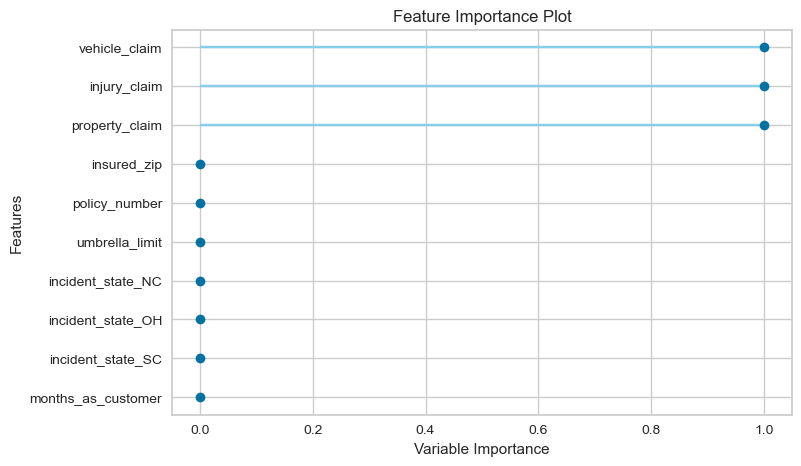

In [110]:
plot_model(best,plot='feature')

In [115]:
tuned_model = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000
1,0.0001,0.0000,0.0001,1.0000,0.0000,0.0000
2,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000
3,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000
4,0.0001,0.0000,0.0001,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000
6,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000
7,0.0001,0.0000,0.0001,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [117]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,0.0002,0.0000,0.0003,1.0000,0.0000,0.0000


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,total_claim_amount,prediction_label
613,84,29,630998,2003-04-09,OH,250/500,1000,1117.170044,0,473645,...,YES,620,1240,4960,BMW,3 Series,2005,N,6820,6820.000139
524,144,35,938634,1993-08-30,IL,100/300,500,1427.459961,0,444922,...,?,17580,8790,61530,Dodge,Neon,1995,N,87900,87899.999799
690,194,38,663938,2011-01-26,IN,100/300,2000,1231.250000,0,604333,...,?,4880,9760,39040,Toyota,Camry,2011,N,53680,53680.000053
457,257,40,414913,2012-07-17,IN,250/500,500,1379.930054,0,608228,...,YES,9420,4710,37680,Audi,A3,2002,Y,51810,51810.000076
85,103,26,979544,2014-04-21,IL,100/300,500,1354.829956,0,475173,...,?,4060,4060,32480,Volkswagen,Passat,2010,N,40600,40600.000335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,310,48,670142,1999-08-06,IN,100/300,500,1516.339966,0,474167,...,NO,13200,6600,39600,Saab,93,1996,Y,59400,59399.999744
511,250,42,254837,2004-11-25,IN,100/300,500,1055.599976,0,457962,...,?,13600,6800,54400,Ford,Fusion,2009,Y,74800,74800.000032
437,150,30,290162,1994-03-12,IN,100/300,1000,1677.260010,0,439690,...,YES,510,510,3570,Volkswagen,Jetta,2013,N,4590,4590.000165
367,41,26,619589,2006-03-28,IL,100/300,1000,1383.130005,0,618405,...,?,530,1060,5300,Jeep,Grand Cherokee,1997,N,6890,6890.000172


In [118]:
test_pred=predict_model(tuned_model,data=data_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,0.0003,0.0000,0.0004,1.0000,0.0000,0.0000


In [113]:
test_pred

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,total_claim_amount,prediction_label
0,1,33,388616,1995-12-06,OH,250/500,2000,1391.630005,0,466390,...,NO,6940,6940,55520,Mercedes,C300,2000,N,69400,69400.000469
1,5,21,577992,2002-11-13,IN,250/500,500,915.409973,5000000,612316,...,NO,4050,4050,32400,Nissan,Pathfinder,1998,N,40500,40500.000340
2,64,28,342830,1991-11-09,IL,500/1000,1000,1468.819946,0,474731,...,NO,5000,10000,45000,Honda,Accord,1997,N,60000,60000.000156
3,142,30,491170,1998-01-14,IN,500/1000,500,1412.760010,0,603260,...,NO,11220,11220,44880,Volkswagen,Jetta,1996,N,67320,67319.999683
4,97,27,175553,2002-04-25,OH,500/1000,500,1588.260010,0,434370,...,YES,8410,8410,58870,Saab,95,2014,N,75690,75690.000351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,38,941851,1991-07-16,OH,500/1000,1000,1310.800049,0,431289,...,?,17440,8720,61040,Honda,Accord,2006,N,87200,87199.999801
96,285,41,186934,2014-01-05,IL,100/300,1000,1436.790039,0,608177,...,?,18080,18080,72320,Volkswagen,Passat,2015,N,108480,108479.999394
97,130,34,918516,2003-02-17,OH,250/500,500,1383.489990,3000000,442797,...,YES,7500,7500,52500,Suburu,Impreza,1996,N,67500,67500.000323
98,458,62,533940,2011-11-18,IL,500/1000,2000,1356.920044,5000000,441714,...,YES,5220,5220,36540,Audi,A5,1998,N,46980,46980.000270


In [ ]:
!mlflow ui

In [ ]:
# tracer les résidus 
plot_model ( best ,  plot  =  'residuals' )

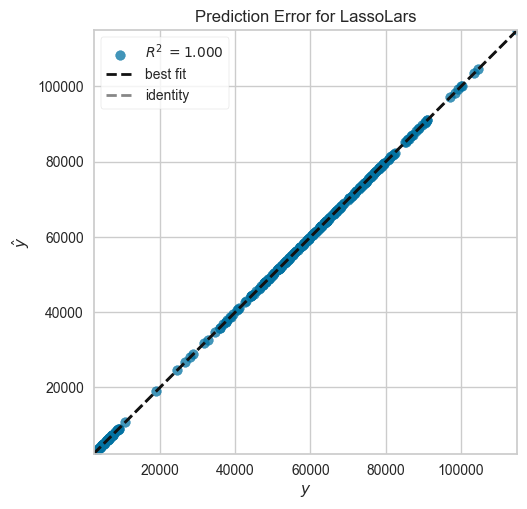

In [160]:
# erreur de tracé 
plot_model ( best ,  plot  =  'error' )

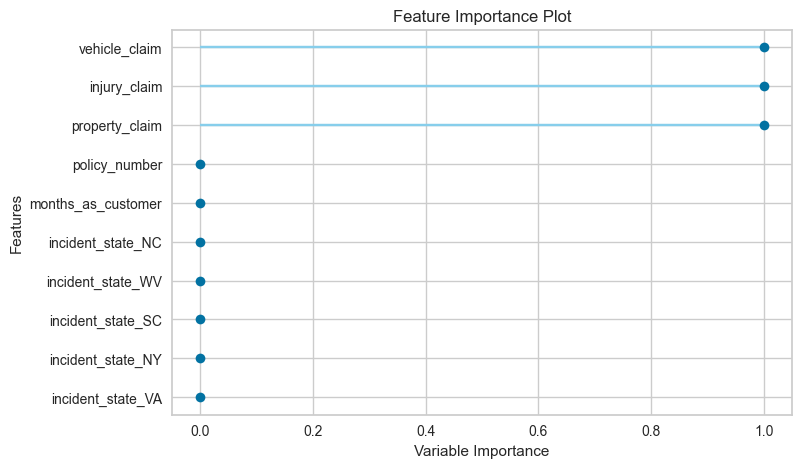

In [161]:
# importance des fonctionnalités du tracé 
plot_model ( best ,  plot  =  'feature' )